# Loan approval machine learning model

# Description

Finance companies deals with some kinds of home loans. They may have their presence across urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
Mostly Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, I have provided a data set to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. Try to automate this Loan Eligibility Process.

Loan_ID- Unique Loan ID

Gender- Male/ Female

Married- Applicant married (Y/N)

Dependents- Number of dependents

Education- Applicant Education (Graduate/ Under Graduate)

Self_Employed- Self employed (Y/N)

ApplicantIncome- Applicant income

CoapplicantIncome- Coapplicant income

LoanAmount- Loan amount in thousands

Loan_Amount_Term- Term of loan in months

Credit_History- credit history meets guidelines

Property_Area- Urban/ Semi Urban/ Rural

Loan_Status- (Target) Loan approved (Y/N)

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Loan_Train.csv')

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_dummy= pd.get_dummies(df, columns=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],drop_first= True)
df_dummy = df_dummy.drop('Loan_ID', axis=1)
df_dummy

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,1
610,3+,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0,1
611,1,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,1,1
612,2,7583,0.0,187.0,360.0,1.0,1,1,0,0,0,1,1


In [6]:
correlation = df_dummy.corr()

<AxesSubplot:>

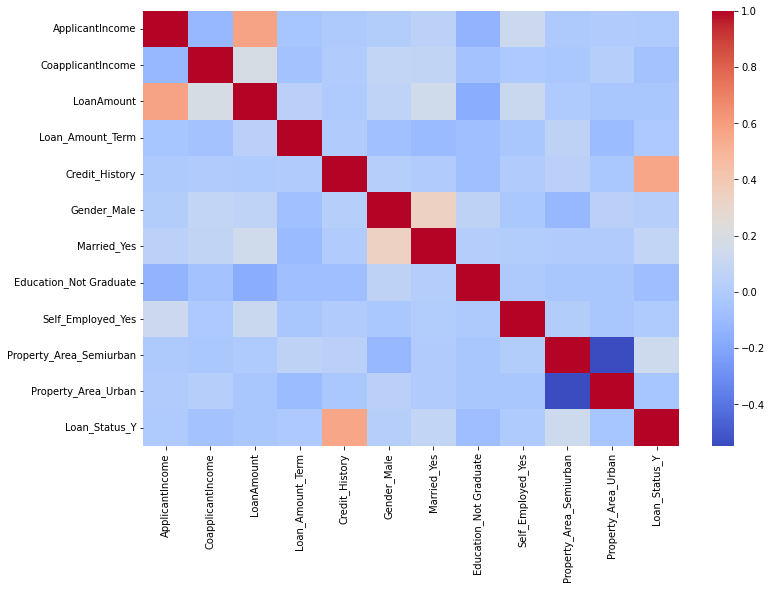

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation, cmap='coolwarm')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status_Y'>

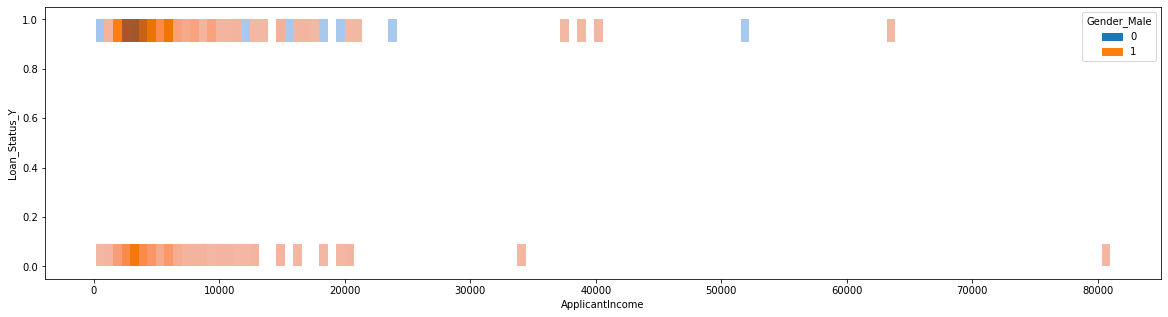

In [8]:
plt.figure(figsize=(20,5))
sns.histplot(x='ApplicantIncome', y='Loan_Status_Y', data = df_dummy,hue ='Gender_Male')

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status_Y'>

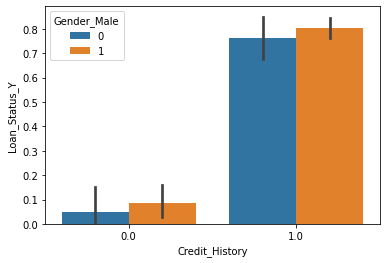

In [9]:
sns.barplot(x='Credit_History', y='Loan_Status_Y', data = df_dummy,hue ='Gender_Male')

<AxesSubplot:xlabel='Education_Not Graduate', ylabel='LoanAmount'>

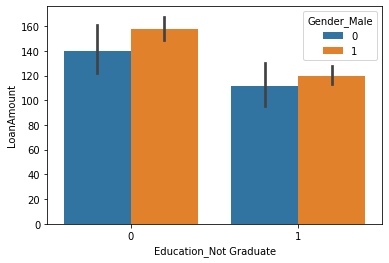

In [10]:
sns.barplot(x='Education_Not Graduate', y='LoanAmount', data = df_dummy,hue ='Gender_Male')

<AxesSubplot:xlabel='count', ylabel='Loan_Status_Y'>

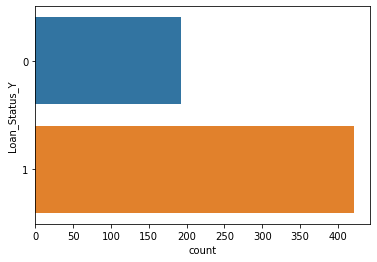

In [11]:
sns.countplot(y ='Loan_Status_Y', data =df_dummy,hue_order='Gender_Male' )

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

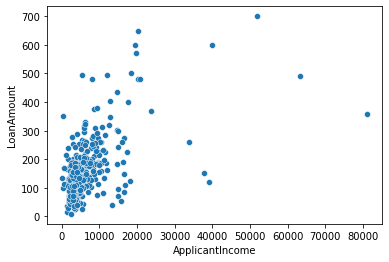

In [12]:
sns.scatterplot(x='ApplicantIncome', y = 'LoanAmount',data = df_dummy)

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

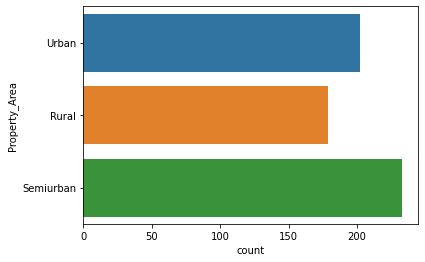

In [13]:
sns.countplot(y ='Property_Area', data =df,hue_order='Gender_Male')

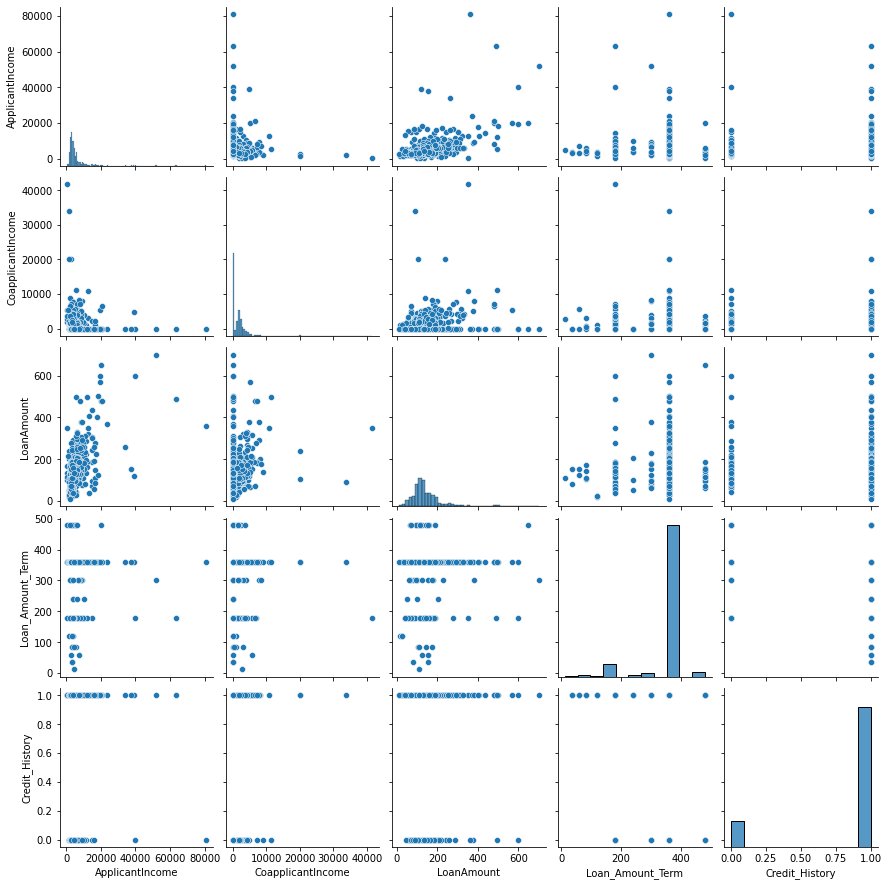

In [14]:
sns.pairplot(df)

C:\Users\kloke\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

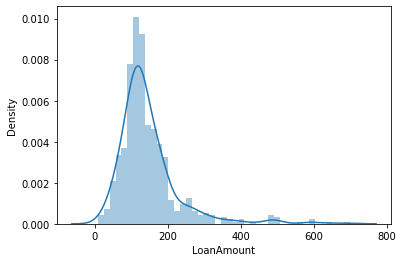

In [15]:
sns.distplot(df_dummy['LoanAmount'])

C:\Users\kloke\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

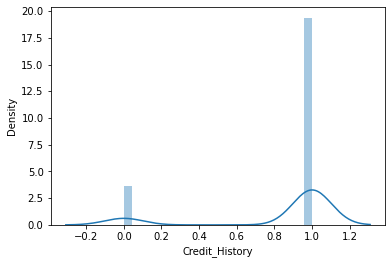

In [117]:
sns.distplot(df_dummy['Credit_History'])

C:\Users\kloke\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

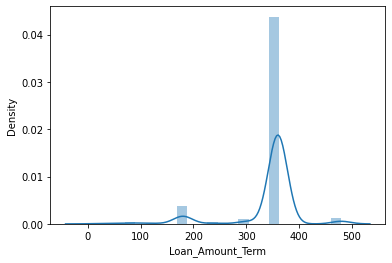

In [16]:
sns.distplot(df_dummy['Loan_Amount_Term'])

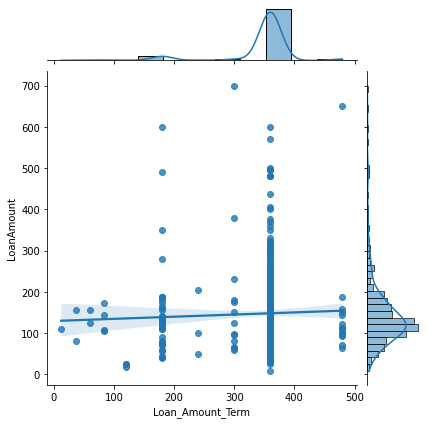

In [17]:
sns.jointplot(x='Loan_Amount_Term',y='LoanAmount',data=df,kind='reg')

<AxesSubplot:>

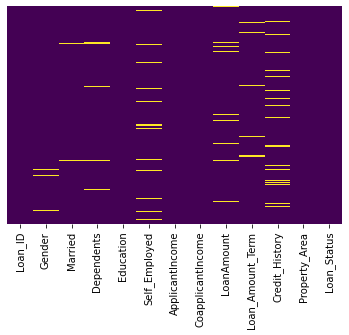

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
df_dropped=df_dummy.dropna()
#df_replaced = df_dropped['Dependents'].apply(lambda x : '3' if (df_dropped['Dependents']=='3+') else pass)
df_dropped['Dependents'] = df_dropped['Dependents'].replace('3+','3')

C:\Users\kloke\AppData\Local\Temp/ipykernel_31900/3645522741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Dependents'] = df_dropped['Dependents'].replace('3+','3')


In [21]:
X=df_dropped[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Gender_Male','Married_Yes','Education_Not Graduate','Self_Employed_Yes','Property_Area_Semiurban','Property_Area_Urban']]
y=df_dropped['Loan_Status_Y']
y.shape


(517,)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.25, 
                                                    random_state=42)

In [90]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [91]:
predictions = lr.predict(X_test)

In [92]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print('\n confusion matrix')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.47      0.62        32
           1       0.85      0.99      0.92        98

    accuracy                           0.86       130
   macro avg       0.89      0.73      0.77       130
weighted avg       0.87      0.86      0.84       130


 confusion matrix
[[15 17]
 [ 1 97]]


# K Means clustering

In [93]:
#from sklearn.cluster import KMeans

In [94]:
#kmeans = KMeans(n_clusters=2)

In [95]:
#kmeans.fit(X_train,y_train)

In [96]:
#kmeans.labels_

In [97]:
#, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
#x1.set_title('K Means')
#x1.scatter(X_train,y_train,c=kmeans.labels_,cmap='rainbow')
#x2.set_title("Original")
#x2.scatter(X_test,y_test,cmap='rainbow')

# Random forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
clf = RandomForestClassifier(n_estimators=140)
clf
clf.fit(X_train, y_train)
from sklearn.metrics import classification_report,confusion_matrix

In [100]:
predictions=clf.predict(X_test)

In [101]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.53      0.64        32
           1       0.86      0.96      0.91        98

    accuracy                           0.85       130
   macro avg       0.84      0.75      0.77       130
weighted avg       0.85      0.85      0.84       130

[[17 15]
 [ 4 94]]


# support vector machine 

In [102]:
from sklearn.svm import SVC

In [103]:
model = SVC()

In [104]:
model.fit(X_train, y_train)

SVC()

# Predictions and Evaluations 

In [105]:
predictions_svm = model.predict(X_test)

In [106]:
print(confusion_matrix(y_test, predictions_svm))

[[ 0 32]
 [ 0 98]]


In [107]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.53      0.64        32
           1       0.86      0.96      0.91        98

    accuracy                           0.85       130
   macro avg       0.84      0.75      0.77       130
weighted avg       0.85      0.85      0.84       130



Gridsearch 

In [108]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [111]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.679 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.679 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.662 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [112]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [113]:
grid.best_estimator_

SVC(C=1, gamma=0.001)

In [114]:
grid_predictions = grid.predict(X_test)

In [115]:
print(confusion_matrix(y_test,grid_predictions))

[[ 4 28]
 [ 1 97]]


In [116]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.80      0.12      0.22        32
           1       0.78      0.99      0.87        98

    accuracy                           0.78       130
   macro avg       0.79      0.56      0.54       130
weighted avg       0.78      0.78      0.71       130

